## Двухслойная нейронная сеть на numpy

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


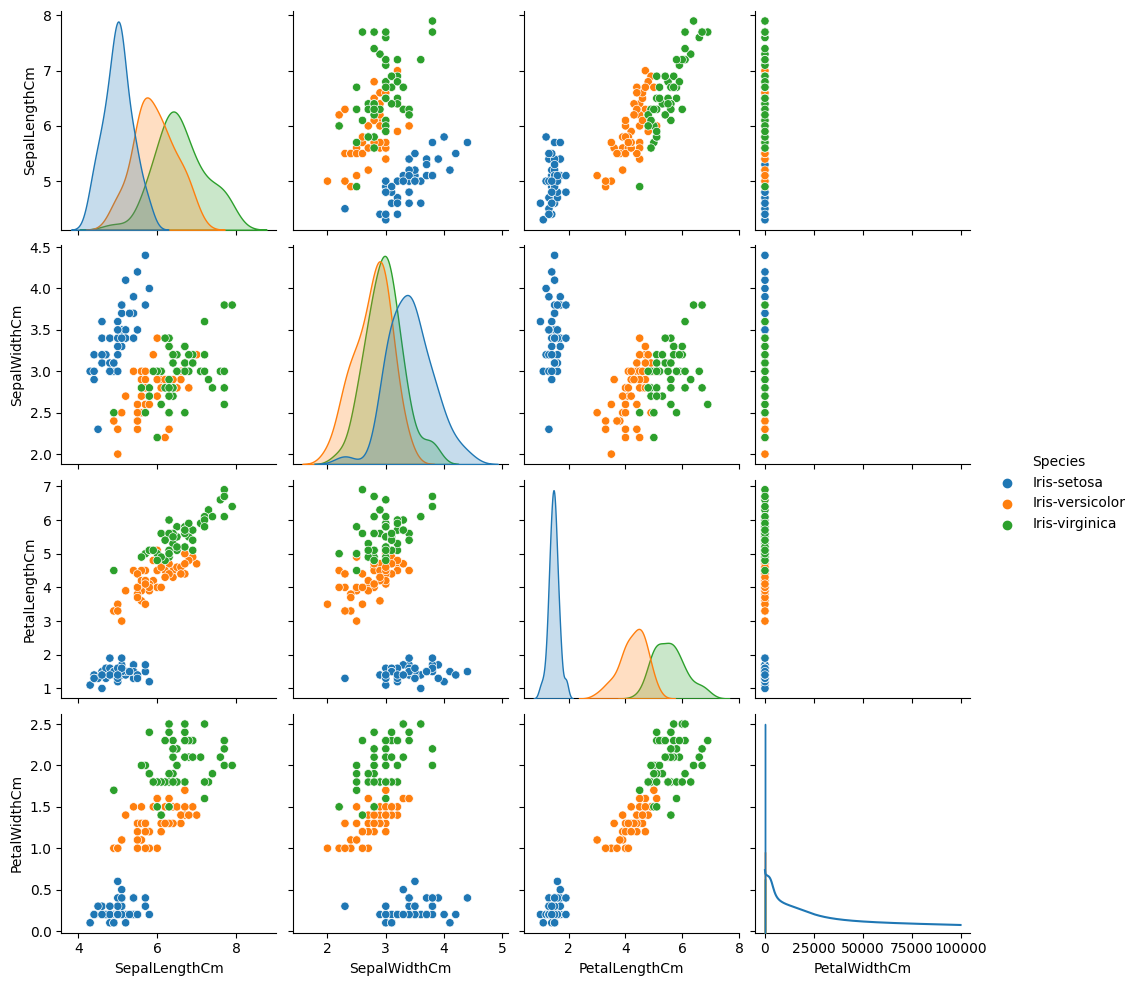

Точность нейронной сети 94.03%


In [1]:
'''
Построение двухслойной нейронный сети для классификации цветков ириса
'''

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split


### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)


### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("./Iris.csv")
print(iris_data.head()) # расскоментируйте, чтобы посмотреть структуру данных

# репрезентация данных в виде графиков
g = sns.pairplot(iris_data.drop("Id", axis=1), hue="Species")
# plt.show() # расскоментируйте, чтобы посмотреть

# замена текстовых значений на цифровые
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.values)

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.values
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
   
### Шаг 3. Обученние нейронной сети
# присваевание случайных весов
w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 3 выхода
w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

# скорость обучения (learning rate)
n = 0.001

# массив для ошибок, чтобы потом построить график
errors = []

# процесс обучения
for i in range(100000): #100,000

    # прямое распространение(feed forward)
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # обратное распространение(back propagation) с использованием градиентного спуска
    layer2_error = y_train - layer2
    layer2_delta = layer2_error * sigmoid_deriv(layer2)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)
    
    w1 += layer1.T.dot(layer2_delta) * n
    w0 += layer0.T.dot(layer1_delta) * n
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100


### Шаг 4. Демонстрация полученных результатов
# черчение диаграммы точности в зависимости от обучения
plt.plot(errors)
plt.xlabel('Обучение')
plt.ylabel('Ошибка')
plt.show() # расскоментируйте, чтобы посмотреть 
        
print("Точность нейронной сети " + str(round(accuracy,2)) + "%")

## Задание

Попробуйте видоизменить параметры разобранной на уроке нейронной сети таким образом, чтобы улучшить её точность. Проведите анализ:
- Что приводит к ухудшению точности нейронной сети?
- Что приводит к увеличению её точности?


In [17]:
def calc(X_train, y_train, 
         n1_exit=5,
         n=0.001, 
         iter_num=100000):
    
    accuracy = 0
    
    # присваевание случайных весов
    w0 = 2*np.random.random((4, n1_exit)) - 1 # для входного слоя
    w1 = 2*np.random.random((n1_exit, 3)) - 1 # для внутреннего слоя
    
    # массив для ошибок, чтобы потом построить график
    errors = []
    
    # процесс обучения
    for i in range(iter_num): #100,000
    
        # прямое распространение(feed forward)
        layer0 = X_train
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))
    
        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_train - layer2
        layer2_delta = layer2_error * sigmoid_deriv(layer2)
        
        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(layer1)
        
        w1 += layer1.T.dot(layer2_delta) * n
        w0 += layer0.T.dot(layer1_delta) * n
        
        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100

    accuracy = round(accuracy, 2)
    print(f"Точность нейронной сети {accuracy}% при параметрах: n1_exit={n1_exit} n={n} iter_num={iter_num}")
    return accuracy

In [19]:
res = []
best_acc = 0
best_params = {}
for iter_num in [50000, 100000, 500000]:
    for n in [0.001, 0.005, 0.01, 0.05]:
        for n1_exit in [3, 4, 5, 6 ,7]:
            accuracy = calc(X_train, y_train,
                 n1_exit=n1_exit,
                 n=n,
                 iter_num=iter_num)
            
            res.append({
                 'accuracy': accuracy,
                 'n1_exit': n1_exit,
                 'n': n,
                 'iter_num': iter_num,
            })
            
            if accuracy > best_acc:
                best_acc = accuracy
                best_params = res[-1]

print(f'Лучшая точность: {best_acc} при параметрах: {best_params}')

Точность нейронной сети 86.1% при параметрах: n1_exit=3 n=0.001 iter_num=50000
Точность нейронной сети 84.63% при параметрах: n1_exit=4 n=0.001 iter_num=50000
Точность нейронной сети 89.15% при параметрах: n1_exit=5 n=0.001 iter_num=50000
Точность нейронной сети 90.94% при параметрах: n1_exit=6 n=0.001 iter_num=50000
Точность нейронной сети 88.61% при параметрах: n1_exit=7 n=0.001 iter_num=50000
Точность нейронной сети 94.09% при параметрах: n1_exit=3 n=0.005 iter_num=50000
Точность нейронной сети 97.02% при параметрах: n1_exit=4 n=0.005 iter_num=50000
Точность нейронной сети 95.81% при параметрах: n1_exit=5 n=0.005 iter_num=50000
Точность нейронной сети 97.74% при параметрах: n1_exit=6 n=0.005 iter_num=50000
Точность нейронной сети 95.98% при параметрах: n1_exit=7 n=0.005 iter_num=50000
Точность нейронной сети 97.7% при параметрах: n1_exit=3 n=0.01 iter_num=50000
Точность нейронной сети 97.27% при параметрах: n1_exit=4 n=0.01 iter_num=50000
Точность нейронной сети 97.36% при параметра

/tmp/ipykernel_1355/1873889922.py:39: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


Точность нейронной сети 91.18% при параметрах: n1_exit=3 n=0.05 iter_num=100000
Точность нейронной сети 98.03% при параметрах: n1_exit=4 n=0.05 iter_num=100000
Точность нейронной сети 97.91% при параметрах: n1_exit=5 n=0.05 iter_num=100000
Точность нейронной сети 97.79% при параметрах: n1_exit=6 n=0.05 iter_num=100000
Точность нейронной сети 97.77% при параметрах: n1_exit=7 n=0.05 iter_num=100000
Точность нейронной сети 97.52% при параметрах: n1_exit=3 n=0.001 iter_num=500000
Точность нейронной сети 97.67% при параметрах: n1_exit=4 n=0.001 iter_num=500000
Точность нейронной сети 97.44% при параметрах: n1_exit=5 n=0.001 iter_num=500000
Точность нейронной сети 97.31% при параметрах: n1_exit=6 n=0.001 iter_num=500000
Точность нейронной сети 97.04% при параметрах: n1_exit=7 n=0.001 iter_num=500000
Точность нейронной сети 96.92% при параметрах: n1_exit=3 n=0.005 iter_num=500000
Точность нейронной сети 97.67% при параметрах: n1_exit=4 n=0.005 iter_num=500000
Точность нейронной сети 97.54% пр